# 회사 소비당가 재 파악
- 4.7J분석에서 만든 `user_df`와 `complete.lesson`를 활용
- 회사 입장에서 무료체험에 사용되는 가상의 비용을 산정
- "무료 체험은 회사에 경제적인 이득을 가져다준다" 란 대립가설 설정하여 분석 진행
- 코랩에서 실행 시 `complete.lesson` 파일이 커서 실행이 끊기는 현상 발생
- vs_code로 진행하면서 이곳에 정리

In [35]:
import pandas as pd
import numpy as np

### 분석할 데이터 불러오기
- `user_df` 내 유저들이 각 구독 기간 내 얼마나 레슨 완료를 했는지 확인
- 레슨 당 값어치 분석

In [ ]:
# 4.7J_user_df 데이터 불러오기
user_df = pd.read_csv(
    r"C:\Users\nuwba\Desktop\Codeit_2\중급1_프로젝트\4·7J_user_df.csv",
    encoding="utf-8-sig"
)

# complete.lesson 불러오기
complete_lesson_df = pd.read_csv(
    r"C:\Users\nuwba\Desktop\Codeit_2\중급1_프로젝트\주제2_원본데이터\주제2_구독서비스_프로덕트_데이터분석\complete.lesson.csv",
    encoding="utf-8-sig"
)

---

### 각 유저별 레슨 완료 횟수판별

In [ ]:
# 중복 없이 유저 수 계산
user_ids = set(user_df['user_id'].unique())
complete_ids = set(complete_lesson_df['user_id'].unique())

# 교집합: 레슨 완료 이력이 있는 유저
matched_ids = user_ids & complete_ids
unmatched_ids = user_ids - complete_ids

# 결과 출력
print(f"[1] user_df 유저 수             : {len(user_ids)}")
print(f"[2] complete.lesson 유저 수    : {len(complete_ids)}")
print(f"[3] user_df 중 레슨 완료 유저  : {len(matched_ids)}")
print(f"[4] user_df 중 미등장 유저     : {len(unmatched_ids)}")
print(f"[5] 비율                       : {len(matched_ids) / len(user_ids):.2%}")

[1] user_df 유저 수             : 13879
[2] complete.lesson 유저 수    : 49683
[3] user_df 중 레슨 완료 유저  : 12562
[4] user_df 중 미등장 유저     : 1317
[5] 비율                       : 90.51%


- user_df 중 미등장 유저 1,317명 제거하고 분석 진행

In [ ]:
# 1. complete.lesson에 등장한 유저 ID 집합
complete_user_ids = set(complete_lesson_df['user_id'].unique())

# 2. user_df 내 중복 제거 (user_id 기준)
user_df_dedup = user_df.drop_duplicates(subset='user_id', keep='first').copy()

# 3. 레슨 완료 이력 있는 유저만 필터링
user_df_with_logs = user_df_dedup[user_df_dedup['user_id'].isin(complete_user_ids)].copy()

# 4. 제거된 유저 수 확인
removed_count = len(user_df_dedup) - len(user_df_with_logs)
print(f"레슨 완료 이력이 없는 유저 제거 수: {removed_count}")
print(f"최종 남은 유저 수: {len(user_df_with_logs)}")

레슨 완료 이력이 없는 유저 제거 수: 1317
최종 남은 유저 수: 12562


In [ ]:
user_df_with_logs

,user_id,first_complete_time,first_cancel_time,plan_type,plan_price,subscription_months,LTR
0,0000572f2ba8079bcefd2760b632e820,2023-03-25 14:40:01.647,2023-12-31 23:59:59.999,1개월 플랜,15920.0,9,143280.000000
1,000087537cbfd934375364218ff10f91,2023-04-08 11:45:01.586,2023-12-31 23:59:59.999,12개월 플랜,131600.0,9,98700.000000
2,0001f15911b404f3bf5b8571afafa4e4,2023-11-29 01:13:51.820,2023-12-31 23:59:59.999,1개월 플랜,15920.0,1,15920.000000
3,000be07bc09ceff42c11978f4a9f1c1a,2022-08-20 13:05:01.083,2023-12-31 23:59:59.999,12개월 플랜,131600.0,16,175466.666667
4,001cd989a26ba664b086b92c364dc9cf,2022-04-28 10:49:02.241,2023-05-13 14:37:47.093,12개월 플랜,131600.0,12,131600.000000
...,...,...,...,...,...,...,...
13889,ffe800abf1a0c00994b2a5b1ce68c681,2023-10-29 18:09:42.524,2023-11-28 19:37:14.236,1개월 플랜,15920.0,1,15920.000000
13890,ffe8f08cd65e082952aca5a3110f5601,2023-11-28 13:56:53.231,2023-12-31 23:59:59.999,1개월 플랜,15920.0,1,15920.000000
13891,ffefd2c23af0e8de9a5bb9aebc498d07,2023-06-25 10:04:08.372,2023-12-31 23:59:59.999,1개월 플랜,15920.0,6,95520.000000
13892,fff219b952002818462faa3746343f09,2022-06-20 02:03:39.500,2022-06-20 07:31:21.873,12개월 플랜,131600.0,12,131600.000000


---

### `first_complete_time`과, `subscription_months`을 사용하여 
### 각 유저별 구독기간 내 레슨 완료 건수 세기

In [ ]:
from pandas.tseries.offsets import DateOffset

# 1. datetime 변환
user_df_with_logs['first_complete_time'] = pd.to_datetime(user_df_with_logs['first_complete_time'])

# 2. NaN인 개월 수는 0으로 채우고 정수형으로 변환
user_df_with_logs['subscription_months'] = user_df_with_logs['subscription_months'].fillna(0).astype(int)

# 3. 종료일 계산: 시작일 + 개월 수
user_df_with_logs['subscription_end_date'] = user_df_with_logs.apply(
    lambda row: row['first_complete_time'] + DateOffset(months=row['subscription_months']),
    axis=1
)

# 4. 확인
user_df_with_logs[['user_id', 'first_complete_time', 'subscription_months', 'subscription_end_date']].head()

,user_id,first_complete_time,subscription_months,subscription_end_date
0,0000572f2ba8079bcefd2760b632e820,2023-03-25 14:40:01.647,9,2023-12-25 14:40:01.647
1,000087537cbfd934375364218ff10f91,2023-04-08 11:45:01.586,9,2024-01-08 11:45:01.586
2,0001f15911b404f3bf5b8571afafa4e4,2023-11-29 01:13:51.820,1,2023-12-29 01:13:51.820
3,000be07bc09ceff42c11978f4a9f1c1a,2022-08-20 13:05:01.083,16,2023-12-20 13:05:01.083
4,001cd989a26ba664b086b92c364dc9cf,2022-04-28 10:49:02.241,12,2023-04-28 10:49:02.241


In [ ]:
# 1. 날짜 형식 변환 (혹시 안 되어 있을 경우)
complete_lesson_df['client_event_time'] = pd.to_datetime(complete_lesson_df['client_event_time'])

# 2. 필요한 컬럼만 merge
merged = complete_lesson_df.merge(
    user_df_with_logs[['user_id', 'first_complete_time', 'subscription_end_date']],
    on='user_id',
    how='inner'
)

# 3. 기간 내 레슨 완료 로그 필터링
mask = (
    (merged['client_event_time'] >= merged['first_complete_time']) &
    (merged['client_event_time'] <= merged['subscription_end_date'])
)
filtered_logs = merged[mask]

# 4. 유저별 레슨 완료 수 세기
lesson_counts = filtered_logs.groupby('user_id').size().reset_index(name='lesson_complete_count_in_subscription')

# 5. 다시 user_df에 merge
user_df_with_logs = user_df_with_logs.merge(lesson_counts, on='user_id', how='left')

# 6. 레슨 수가 없는 유저는 0으로 처리
user_df_with_logs['lesson_complete_count_in_subscription'] = user_df_with_logs['lesson_complete_count_in_subscription'].fillna(0).astype(int)

# 7. 결과 확인
user_df_with_logs[['user_id', 'subscription_months', 'lesson_complete_count_in_subscription']]

,user_id,subscription_months,lesson_complete_count_in_subscription
0,0000572f2ba8079bcefd2760b632e820,9,20
1,000087537cbfd934375364218ff10f91,9,5
2,0001f15911b404f3bf5b8571afafa4e4,1,41
3,000be07bc09ceff42c11978f4a9f1c1a,16,217
4,001cd989a26ba664b086b92c364dc9cf,12,36
...,...,...,...
12557,ffe800abf1a0c00994b2a5b1ce68c681,1,109
12558,ffe8f08cd65e082952aca5a3110f5601,1,165
12559,ffefd2c23af0e8de9a5bb9aebc498d07,6,49
12560,fff219b952002818462faa3746343f09,12,480


In [ ]:
zero_lesson_users = user_df_with_logs[user_df_with_logs['lesson_complete_count_in_subscription'] == 0]
print(f"레슨 완료 수 0건인 유저 수: {len(zero_lesson_users)}")

레슨 완료 수 0건인 유저 수: 550


In [ ]:
# 레슨 0건 유저 제거
filtered_df = user_df_with_logs[user_df_with_logs['lesson_complete_count_in_subscription'] > 0].copy()

print(f"제거된 유저 수: {len(user_df_with_logs) - len(filtered_df)}")
print(f"남은 유저 수: {len(filtered_df)}")

제거된 유저 수: 550
남은 유저 수: 12012


---

### `filtered_df`(12012명) 사용하여 진행

In [ ]:
filtered_df

,user_id,first_complete_time,first_cancel_time,plan_type,plan_price,subscription_months,LTR,subscription_end_date,lesson_complete_count_in_subscription
0,0000572f2ba8079bcefd2760b632e820,2023-03-25 14:40:01.647,2023-12-31 23:59:59.999,1개월 플랜,15920.0,9,143280.000000,2023-12-25 14:40:01.647,20
1,000087537cbfd934375364218ff10f91,2023-04-08 11:45:01.586,2023-12-31 23:59:59.999,12개월 플랜,131600.0,9,98700.000000,2024-01-08 11:45:01.586,5
2,0001f15911b404f3bf5b8571afafa4e4,2023-11-29 01:13:51.820,2023-12-31 23:59:59.999,1개월 플랜,15920.0,1,15920.000000,2023-12-29 01:13:51.820,41
3,000be07bc09ceff42c11978f4a9f1c1a,2022-08-20 13:05:01.083,2023-12-31 23:59:59.999,12개월 플랜,131600.0,16,175466.666667,2023-12-20 13:05:01.083,217
4,001cd989a26ba664b086b92c364dc9cf,2022-04-28 10:49:02.241,2023-05-13 14:37:47.093,12개월 플랜,131600.0,12,131600.000000,2023-04-28 10:49:02.241,36
...,...,...,...,...,...,...,...,...,...
12557,ffe800abf1a0c00994b2a5b1ce68c681,2023-10-29 18:09:42.524,2023-11-28 19:37:14.236,1개월 플랜,15920.0,1,15920.000000,2023-11-29 18:09:42.524,109
12558,ffe8f08cd65e082952aca5a3110f5601,2023-11-28 13:56:53.231,2023-12-31 23:59:59.999,1개월 플랜,15920.0,1,15920.000000,2023-12-28 13:56:53.231,165
12559,ffefd2c23af0e8de9a5bb9aebc498d07,2023-06-25 10:04:08.372,2023-12-31 23:59:59.999,1개월 플랜,15920.0,6,95520.000000,2023-12-25 10:04:08.372,49
12560,fff219b952002818462faa3746343f09,2022-06-20 02:03:39.500,2022-06-20 07:31:21.873,12개월 플랜,131600.0,12,131600.000000,2023-06-20 02:03:39.500,480


In [ ]:
filtered_df["subscription_months"].describe()

count    12012.000000
mean         5.539710
std          5.451858
min          1.000000
25%          1.000000
50%          3.000000
75%         11.000000
max         24.000000
Name: subscription_months, dtype: float64

In [ ]:
filtered_df["lesson_complete_count_in_subscription"].describe()

count    12012.000000
mean       138.855728
std        190.199306
min          1.000000
25%         29.000000
50%         77.000000
75%        170.000000
max       3345.000000
Name: lesson_complete_count_in_subscription, dtype: float64

In [ ]:
Q1 = filtered_df['lesson_complete_count_in_subscription'].quantile(0.25)
Q3 = filtered_df['lesson_complete_count_in_subscription'].quantile(0.75)
IQR = Q3 - Q1

upper_1_5 = Q3 + 1.5 * IQR
upper_3_0 = Q3 + 3.0 * IQR

outlier_1_5_count = (filtered_df['lesson_complete_count_in_subscription'] > upper_1_5).sum()
outlier_3_0_count = (filtered_df['lesson_complete_count_in_subscription'] > upper_3_0).sum()

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"\n[1.5 IQR 초과] 상한: {upper_1_5:.2f} → 유저 수: {outlier_1_5_count}")
print(f"[3.0 IQR 초과] 상한: {upper_3_0:.2f} → 유저 수: {outlier_3_0_count}")

Q1: 29.0
Q3: 170.0
IQR: 141.0

[1.5 IQR 초과] 상한: 381.50 → 유저 수: 993
[3.0 IQR 초과] 상한: 593.00 → 유저 수: 379


In [ ]:
# 극단 이상치 기준
extreme_upper = 593

# 이상치 제거
final_df = filtered_df[filtered_df['lesson_complete_count_in_subscription'] <= extreme_upper].copy()

# 결과 확인
removed = len(filtered_df) - len(final_df)
print(f"제거된 극단 이상치 유저 수: {removed}")
print(f"최종 남은 유저 수: {len(final_df)}")

제거된 극단 이상치 유저 수: 379
최종 남은 유저 수: 11633


In [ ]:
final_df

,user_id,first_complete_time,first_cancel_time,plan_type,plan_price,subscription_months,LTR,subscription_end_date,lesson_complete_count_in_subscription
0,0000572f2ba8079bcefd2760b632e820,2023-03-25 14:40:01.647,2023-12-31 23:59:59.999,1개월 플랜,15920.0,9,143280.000000,2023-12-25 14:40:01.647,20
1,000087537cbfd934375364218ff10f91,2023-04-08 11:45:01.586,2023-12-31 23:59:59.999,12개월 플랜,131600.0,9,98700.000000,2024-01-08 11:45:01.586,5
2,0001f15911b404f3bf5b8571afafa4e4,2023-11-29 01:13:51.820,2023-12-31 23:59:59.999,1개월 플랜,15920.0,1,15920.000000,2023-12-29 01:13:51.820,41
3,000be07bc09ceff42c11978f4a9f1c1a,2022-08-20 13:05:01.083,2023-12-31 23:59:59.999,12개월 플랜,131600.0,16,175466.666667,2023-12-20 13:05:01.083,217
4,001cd989a26ba664b086b92c364dc9cf,2022-04-28 10:49:02.241,2023-05-13 14:37:47.093,12개월 플랜,131600.0,12,131600.000000,2023-04-28 10:49:02.241,36
...,...,...,...,...,...,...,...,...,...
12557,ffe800abf1a0c00994b2a5b1ce68c681,2023-10-29 18:09:42.524,2023-11-28 19:37:14.236,1개월 플랜,15920.0,1,15920.000000,2023-11-29 18:09:42.524,109
12558,ffe8f08cd65e082952aca5a3110f5601,2023-11-28 13:56:53.231,2023-12-31 23:59:59.999,1개월 플랜,15920.0,1,15920.000000,2023-12-28 13:56:53.231,165
12559,ffefd2c23af0e8de9a5bb9aebc498d07,2023-06-25 10:04:08.372,2023-12-31 23:59:59.999,1개월 플랜,15920.0,6,95520.000000,2023-12-25 10:04:08.372,49
12560,fff219b952002818462faa3746343f09,2022-06-20 02:03:39.500,2022-06-20 07:31:21.873,12개월 플랜,131600.0,12,131600.000000,2023-06-20 02:03:39.500,480


In [ ]:
# 0개월은 계산 불가하므로 우선 제외
final_df = final_df[final_df['subscription_months'] > 0].copy()

# 월 평균 레슨 수 계산
final_df['monthly_avg_lesson_count'] = (
    final_df['lesson_complete_count_in_subscription'] / final_df['subscription_months']
)

# 결과 확인
final_df[['user_id', 'subscription_months', 'lesson_complete_count_in_subscription', 'monthly_avg_lesson_count']]

,user_id,subscription_months,lesson_complete_count_in_subscription,monthly_avg_lesson_count
0,0000572f2ba8079bcefd2760b632e820,9,20,2.222222
1,000087537cbfd934375364218ff10f91,9,5,0.555556
2,0001f15911b404f3bf5b8571afafa4e4,1,41,41.000000
3,000be07bc09ceff42c11978f4a9f1c1a,16,217,13.562500
4,001cd989a26ba664b086b92c364dc9cf,12,36,3.000000
...,...,...,...,...
12557,ffe800abf1a0c00994b2a5b1ce68c681,1,109,109.000000
12558,ffe8f08cd65e082952aca5a3110f5601,1,165,165.000000
12559,ffefd2c23af0e8de9a5bb9aebc498d07,6,49,8.166667
12560,fff219b952002818462faa3746343f09,12,480,40.000000


In [ ]:
# 유저 개별 평균의 평균
user_based_avg = final_df["monthly_avg_lesson_count"].mean()

# 전체 합 기준 평균
total_lessons = final_df['lesson_complete_count_in_subscription'].sum()
total_months = final_df['subscription_months'].sum()
overall_avg = total_lessons / total_months

print(f"[한달 평균 유저의 레슨완료 수] 평균 월별 레슨 수: {user_based_avg:.2f}")
print(f"[전체 서비스 기준] 평균 월별 레슨 수: {overall_avg:.2f}")

[한달 평균 유저의 레슨완료 수] 평균 월별 레슨 수: 49.30
[전체 서비스 기준] 평균 월별 레슨 수: 20.94


---

## 구독 기간 동안 유저들의 레슨 완료 분석 총 정리

### 분석 대상
- 원본 유저 테이블: `user_df_with_logs`
- 조건별 필터링을 통해 **최종 분석 대상 유저 수: 11,633명**
- 전처리 기준:
  - `lesson_complete_count_in_subscription > 0` (레슨 완료 수 1건 이상)
  - `lesson_complete_count_in_subscription <= 593` (3.0 IQR 기준 극단 이상치 제거)
  - `subscription_months > 0` (유효한 구독 개월 수만 포함)

---

### 계산 방식

#### 1. 유저별 월평균 레슨 완료 수
> 각 유저의 구독 기간 동안 한 달에 몇 번씩 레슨을 완료했는지를 개별적으로 계산
```python
monthly_avg = lesson_complete_count_in_subscription / subscription_months
```

#### 2. 전체 유저의 평균값 (User-based Mean)
> “유저들은 보통 한 달에 얼마나 수강하나?”를 알고 싶을 때

```python
monthly_avg_lesson_count.mean()
```
#### 3. 전체 레슨 총합 / 전체 개월 총합 (Global Weighted Mean)
“전체 서비스 기준으로 월 평균 몇 건의 레슨이 일어나나?”를 알고 싶을 때

```python
sum(lesson_complete_count_in_subscription) / sum(subscription_months)
```

---

### 최종 결과 요약

| 분석 기준             | 결과값        | 해석                                     |
| ----------------- | ---------- | -------------------------------------- |
| \[한 달 평균 유저 기준] | **49.30건** | 유저 1명은 한 달에 평균 49건 정도의 레슨을 완료함         |
| \[전체 서비스 기준]    | **20.94건** | 전체 구독 개월을 기준으로 보면, 한 달에 약 21건의 레슨이 완료됨 |

--- 

###  해석 정리

- 구독 개월 수가 짧은 유저도 포함되다 보니, **유저 기준 평균은 높게** 나타남    
- 반면 **전체 구독 개월 수 기준**으로 보면 더 현실적인 평균값 도출됨  

▶ **유저 행태 중심 분석 시 → `49.3건`**    
▶ **서비스 운영/수익 분석 시 → `20.9건`** 참고  


---

### 레슨당 수익(=월 구독료 ÷ 평균 수강 레슨 수)

In [ ]:
# 기준 월 구독료 (1개월 플랜 정가)
monthly_plan_price = 15920

# 전체 서비스 기준 한 달 평균 레슨 완료 수
avg_monthly_lesson_completion = 20.94

# 레슨 1회당 수익 계산
revenue_per_lesson = monthly_plan_price / avg_monthly_lesson_completion

print(f"레슨 1회당 수익 (원): {revenue_per_lesson:.2f}")

레슨 1회당 수익 (원): 760.27


- 레슨당 수익 760.27원 = 기준 단가
- 이 값은 유저가 레슨 하나를 들을 때마다 회사가 벌 수 있는 수익으로 해석 가능

- 이제 유저가 총 몇 개의 레슨을 수강했는지에 따라 회사 수익을 추정할 수 있음

### 유저별 LTR (Life-Time Revenue) 추정 후, 무료체험자 vs 비체험자 간 비교
- 일단 `start.free_trial` 불러오기

In [ ]:
# 1. 무료체험 로그 불러오기
free_trial_df = pd.read_csv(r'C:\Users\nuwba\Desktop\Codeit_2\중급1_프로젝트\주제2_원본데이터\주제2_구독서비스_프로덕트_데이터분석\start.free_trial.csv')

### final_df(정제된 df)안에서 무료체험 사용 유저 나누기

In [ ]:
# 2. 무료체험 유저 ID 리스트 만들기
free_trial_user_ids = set(free_trial_df['user_id'].unique())

# 3. final_df에 무료체험 여부 컬럼 추가
final_df['is_free_trial_user'] = final_df['user_id'].isin(free_trial_user_ids).astype(int)

# 4. 결과 확인 (0: 비체험자, 1: 체험자)
final_df['is_free_trial_user'].value_counts()

is_free_trial_user
0    8812
1    2821
Name: count, dtype: int64

In [ ]:
# 그룹별 평균 LTR
group_ltr = final_df.groupby('is_free_trial_user')['LTR'].mean().reset_index()

# 보기 좋게 컬럼명 바꾸기
group_ltr.columns = ['무료체험 여부 (0=비체험, 1=체험)', '평균 LTR']

print(group_ltr)

   무료체험 여부 (0=비체험, 1=체험)        평균 LTR
0                      0  71698.904524
1                      1  77579.279215


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker

C:\Users\nuwba\AppData\Local\Temp\ipykernel_16676\2423462515.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=group_ltr, x='무료체험 여부', y='평균 LTR', palette=colors)


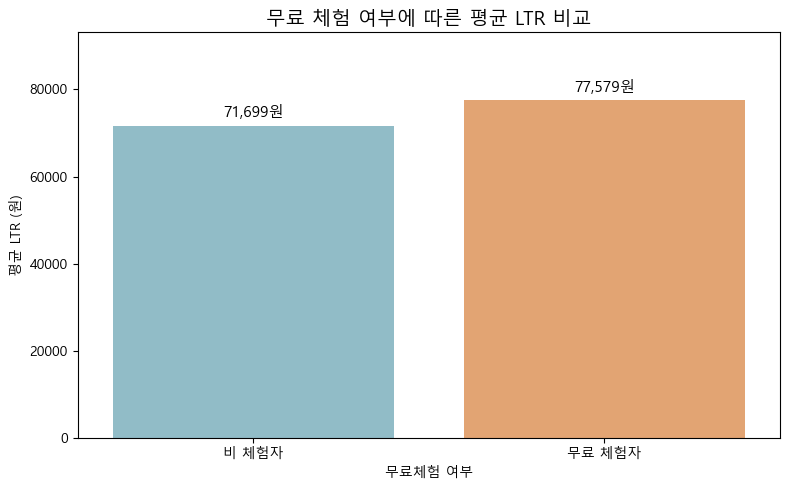

In [ ]:
# ▶ VSCode에서 한글 깨짐 방지 (폰트 설정)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows인 경우
plt.rcParams['axes.unicode_minus'] = False     # 음수 부호 깨짐 방지

# ▶ 그룹별 평균 LTR 계산
group_ltr = final_df.groupby('is_free_trial_user')['LTR'].mean().reset_index()
group_ltr.columns = ['무료체험 여부', '평균 LTR']

# ▶ 시각화용 레이블 치환
group_ltr['무료체험 여부'] = group_ltr['무료체험 여부'].map({0: '비 체험자', 1: '무료 체험자'})

# ▶ 색상 지정
colors = ['#88c1d0', '#f4a261']  # 눈에 편한 블루 & 오렌지

# ▶ 그래프 그리기
plt.figure(figsize=(8, 5))
bars = sns.barplot(data=group_ltr, x='무료체험 여부', y='평균 LTR', palette=colors)

# ▶ 바 위에 값 쓰기
for bar in bars.patches:
    y = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, y + 1000, f'{y:,.0f}원', ha='center', va='bottom', fontsize=11)

# ▶ 라벨 및 제목
plt.ylabel('평균 LTR (원)')
plt.title('무료 체험 여부에 따른 평균 LTR 비교', fontsize=14)
plt.ylim(0, group_ltr['평균 LTR'].max() * 1.2)  # 여유 공간 확보

plt.tight_layout()
plt.show()

- 무료 체험 유저의 평균 LTR이 약 5,880원 더 높음

- 전환률도 무료 체험자가 약 3배 높았으니,   
  단순히 전환만 잘되는 게 아니라 **매출 기여도도 높은 편**

### 그룹간 LTR 비교의 통계적 유의성 검증(t-test)

In [ ]:
from scipy.stats import ttest_ind

# 그룹 분리
trial = final_df[final_df['is_free_trial_user'] == 1]['LTR']
non_trial = final_df[final_df['is_free_trial_user'] == 0]['LTR']

# 독립표본 t-test
t_stat, p_value = ttest_ind(trial, non_trial, equal_var=False)

print(f't-stat: {t_stat:.3f}, p-value: {p_value:.5f}')

t-stat: 4.097, p-value: 0.00004


| 지표        | 값       | 해석                                         |
| --------- | ------- | ------------------------------------------ |
| `t-stat`  | 4.097   | 두 그룹 평균 차이의 통계량 (절댓값이 클수록 차이 큼)            |
| `p-value` | 0.00004 | **유의수준 0.05보다 훨씬 작음** → 차이가 **통계적으로 유의미함** |

<br>

- p-value = 0.00004 < 0.05  
  → 무료 체험 유저와 비 체험 유저의 평균 LTR 차이는 통계적으로 유의미하다
- 즉, 우연이 아니라 실제로 **체험 유저가 평균적으로 더 많은 수익을 발생시킨다는 근거**가 됨


---

## 데이터 기반 CAC(or CPA, Cost Per Action)추정
- 일단 CAC를  
  → 무료 체험 유저는 회사 콘텐츠를 사용했으니 그 사용량에 비례해서 CAC를 추정  
  → 기존에 구했던 레슨 1회당 가격 = 760.27원  
<br>
- 무료 체험 기간 중 수강한 레슨 수 × 760.27원  
  → 유저 1명이 소비한 콘텐츠 비용(=CAC) 으로 추정 가능

### 무료 서비스 체험 유저들의 주 당 평균 레슨 완료 수

In [ ]:
# 주당 평균 수강 수 계산
final_df['weekly_avg_lesson_count'] = final_df['lesson_complete_count_in_subscription'] / (final_df['subscription_months'] * 4.345)

# 무료 체험 유저 평균만 보고 싶다면:
free_weekly_avg = final_df[final_df['is_free_trial_user'] == 1]['weekly_avg_lesson_count'].mean()

print(f'무료 체험 유저 1주일 평균 수강 수: {free_weekly_avg:.2f}건')

무료 체험 유저 1주일 평균 수강 수: 11.51건


- 레슨 1회당 가격 = **760.27원** *  무료 체험 유저 1주일 평균 수강 수: **11.51건**   
  **→ CAC 추정 (보수적 기준) = 약 8,751원**

In [ ]:
estimated_cac = 8751

# 무료 체험자에게만 CAC 적용
final_df['CAC'] = final_df['is_free_trial_user'] * estimated_cac

# LTV 계산
final_df['LTV'] = final_df['LTR'] - final_df['CAC']

In [ ]:
ordered_columns = [
    'user_id',
    'first_complete_time',
    'first_cancel_time',
    'subscription_end_date',
    'plan_type',
    'plan_price',
    'subscription_months',
    'lesson_complete_count_in_subscription',
    'monthly_avg_lesson_count',
    'weekly_avg_lesson_count',
    'is_free_trial_user',
    'LTR',
    'CAC',
    'LTV'
]

# 컬럼 순서 재정렬
final_df = final_df[ordered_columns]

In [ ]:
final_df

,user_id,first_complete_time,first_cancel_time,subscription_end_date,plan_type,plan_price,subscription_months,lesson_complete_count_in_subscription,monthly_avg_lesson_count,weekly_avg_lesson_count,is_free_trial_user,LTR,CAC,LTV
0,0000572f2ba8079bcefd2760b632e820,2023-03-25 14:40:01.647,2023-12-31 23:59:59.999,2023-12-25 14:40:01.647,1개월 플랜,15920.0,9,20,2.222222,0.511444,1,143280.000000,8751,134529.000000
1,000087537cbfd934375364218ff10f91,2023-04-08 11:45:01.586,2023-12-31 23:59:59.999,2024-01-08 11:45:01.586,12개월 플랜,131600.0,9,5,0.555556,0.127861,1,98700.000000,8751,89949.000000
2,0001f15911b404f3bf5b8571afafa4e4,2023-11-29 01:13:51.820,2023-12-31 23:59:59.999,2023-12-29 01:13:51.820,1개월 플랜,15920.0,1,41,41.000000,9.436133,0,15920.000000,0,15920.000000
3,000be07bc09ceff42c11978f4a9f1c1a,2022-08-20 13:05:01.083,2023-12-31 23:59:59.999,2023-12-20 13:05:01.083,12개월 플랜,131600.0,16,217,13.562500,3.121404,1,175466.666667,8751,166715.666667
4,001cd989a26ba664b086b92c364dc9cf,2022-04-28 10:49:02.241,2023-05-13 14:37:47.093,2023-04-28 10:49:02.241,12개월 플랜,131600.0,12,36,3.000000,0.690449,1,131600.000000,8751,122849.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12557,ffe800abf1a0c00994b2a5b1ce68c681,2023-10-29 18:09:42.524,2023-11-28 19:37:14.236,2023-11-29 18:09:42.524,1개월 플랜,15920.0,1,109,109.000000,25.086306,0,15920.000000,0,15920.000000
12558,ffe8f08cd65e082952aca5a3110f5601,2023-11-28 13:56:53.231,2023-12-31 23:59:59.999,2023-12-28 13:56:53.231,1개월 플랜,15920.0,1,165,165.000000,37.974684,0,15920.000000,0,15920.000000
12559,ffefd2c23af0e8de9a5bb9aebc498d07,2023-06-25 10:04:08.372,2023-12-31 23:59:59.999,2023-12-25 10:04:08.372,1개월 플랜,15920.0,6,49,8.166667,1.879555,0,95520.000000,0,95520.000000
12560,fff219b952002818462faa3746343f09,2022-06-20 02:03:39.500,2022-06-20 07:31:21.873,2023-06-20 02:03:39.500,12개월 플랜,131600.0,12,480,40.000000,9.205984,1,131600.000000,8751,122849.000000


### LTV까지 계산 완료 (여기까지 정리)
- CAC: - 레슨 1회당 가격 = **760.27원** *  무료 체험 유저 1주일 평균 수강 수: **11.51건**   
  **→ CAC 추정 (보수적 기준) = 약 8,751원**

- 무료 체험자 유저들에게 CAC 적용
- LTV 계산해서 각 유저들에게 적용

---

### 각 그룹의 LTV 비교
- **"7일 서비스 무료 체험이 회사의 경제적 이득을 가져다주는가?"** 에 대해서 직접적인 확인 가능

In [ ]:
group_ltv = final_df.groupby('is_free_trial_user')['LTV'].mean().reset_index()
group_ltv.columns = ['무료체험 여부', '평균 LTV']

# 0 → 비 체험자, 1 → 무료 체험자
group_ltv['무료체험 여부'] = group_ltv['무료체험 여부'].map({0: '비 체험자', 1: '무료 체험자'})

print(group_ltv)

  무료체험 여부        평균 LTV
0   비 체험자  71698.904524
1  무료 체험자  68828.279215


C:\Users\nuwba\AppData\Local\Temp\ipykernel_16676\2542253220.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=group_ltv, x='무료체험 여부', y='평균 LTV', palette=colors)


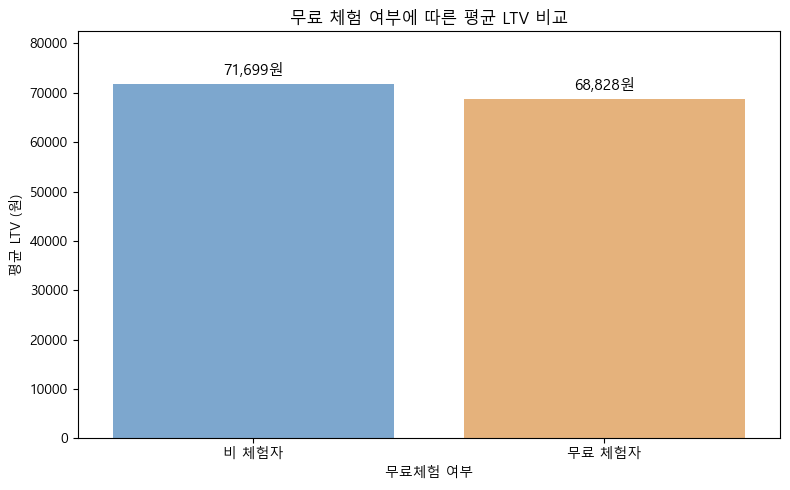

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

colors = ['#6fa8dc', '#f6b26b']

plt.figure(figsize=(8, 5))
bars = sns.barplot(data=group_ltv, x='무료체험 여부', y='평균 LTV', palette=colors)

# 바 위에 값 쓰기
for bar in bars.patches:
    y = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, y + 1000, f'{y:,.0f}원', ha='center', va='bottom', fontsize=11)

plt.ylabel('평균 LTV (원)')
plt.title('무료 체험 여부에 따른 평균 LTV 비교')
plt.ylim(0, group_ltv['평균 LTV'].max() * 1.15)
plt.tight_layout()
plt.show()

### LTV 그룹간 비교의 통계적 유의성 검증(t-test 진행)

In [33]:
import numpy as np
from scipy.stats import f, ttest_ind

# LTV 데이터 분리
trial_ltv = final_df[final_df['is_free_trial_user'] == 1]['LTV']
non_trial_ltv = final_df[final_df['is_free_trial_user'] == 0]['LTV']

# 표본 수
n1, n2 = len(trial_ltv), len(non_trial_ltv)

# 표본 분산
var1 = np.var(trial_ltv, ddof=1)
var2 = np.var(non_trial_ltv, ddof=1)

# F 통계량 (항상 큰 분산 / 작은 분산)
if var1 > var2:
    f_stat = var1 / var2
    dfn, dfd = n1 - 1, n2 - 1
else:
    f_stat = var2 / var1
    dfn, dfd = n2 - 1, n1 - 1

# 양측 검정 p-value
p_val_f = 2 * (1 - f.cdf(f_stat, dfn, dfd))

print("[F-검정 결과]")
print(f"F 통계량: {f_stat:.3f}")
print(f"p-value: {p_val_f:.4f}")
print("등분산 가정 여부:", "등분산 아님 → Welch’s T-test" if p_val_f < 0.05 else "등분산 가정 가능")

[F-검정 결과]
F 통계량: 1.182
p-value: 0.0000
등분산 가정 여부: 등분산 아님 → Welch’s T-test


In [34]:
equal_var = p_val_f >= 0.05  # 등분산이면 True, 아니면 False

t_stat, p_val_t = ttest_ind(trial_ltv, non_trial_ltv, equal_var=equal_var)

print("\n[T-검정 결과]")
print(f"T 통계량: {t_stat:.2f}")
print(f"p-value: {p_val_t:.4f}")


[T-검정 결과]
T 통계량: -2.00
p-value: 0.0456


- 무료 체험 유저는 전환률은 높지만,  
  CAC를 보수적으로 반영해 LTV를 계산했을 때     
  → **비 체험자보다 오히려 평균 LTV가 낮은 것으로 나타남**  

- 두 그룹 간 LTV 차이는 통계적으로도 유의미했으며 (p = 0.045),  
  이 결과는 **무료 체험이 반드시 경제적 이득으로 이어지지 않을 수도 있다는 가능성**을 보여줌

- CPA를 유저별로 다르게 설정하여 구하기
- `enter.lesson_page`에 있는 is_free_trial 가 true일 때 에 따른 유저들을 따로 나눠서 진행